In [2]:
import numpy as np
import os
import warnings
import seaborn as sns
import pandas as pd #we find the toolbox "pandas" and rename it as "pd"
from sklearn import cluster
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.cluster import BisectingKMeans


In [4]:
ProjectData=pd.read_csv('hotel_booking_data_cleaned.csv')
feature1=['hotel','customer_type','meal','reserved_room_type','assigned_room_type','deposit_type','adr','required_car_parking_spaces']
AssignmentData=ProjectData[feature1] #set a new dataset that only contains the data we want to explore
AssignmentData.head()

hotel customer_type meal reserved_room_type assigned_room_type  \
0  Resort Hotel     Transient   BB                  C                  C   
1  Resort Hotel     Transient   BB                  C                  C   
2  Resort Hotel     Transient   BB                  A                  C   
3  Resort Hotel     Transient   BB                  A                  A   
4  Resort Hotel     Transient   BB                  A                  A   

  deposit_type   adr  required_car_parking_spaces  
0   No Deposit   0.0                            0  
1   No Deposit   0.0                            0  
2   No Deposit  75.0                            0  
3   No Deposit  75.0                            0  
4   No Deposit  98.0                            0

Text(0.5, 0, 'hotel')

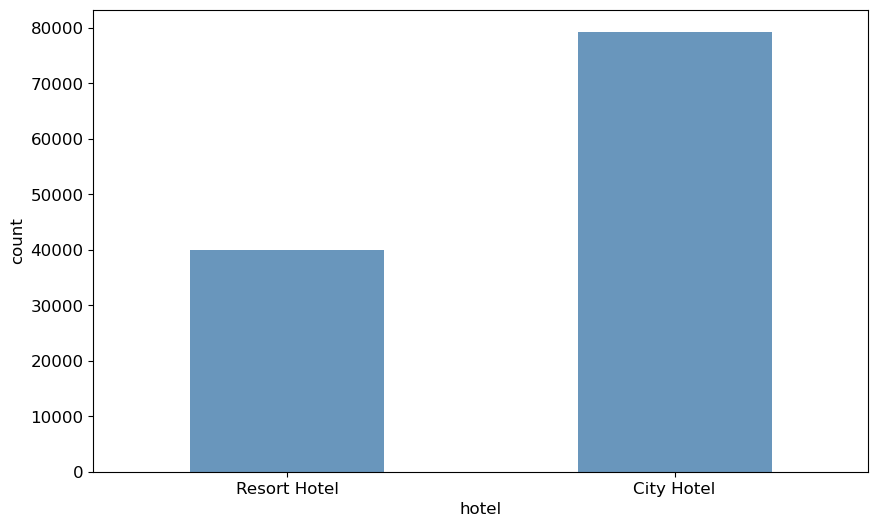

In [5]:
df = pd.DataFrame(ProjectData)
plt.rc('font', size=12)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='hotel', data=df , palette=['#5b97ca'],width=0.5)
plt.xlabel('hotel')

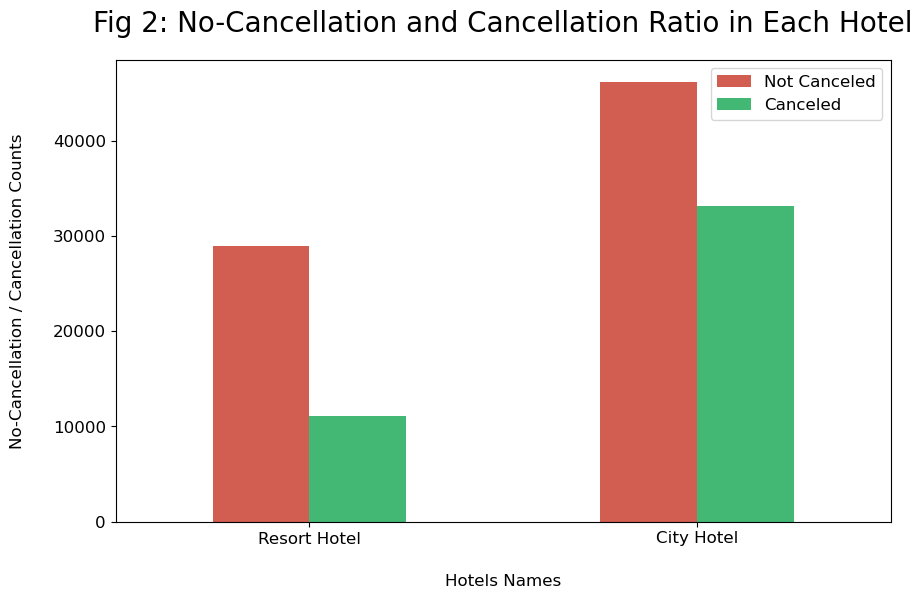

In [6]:
df = pd.DataFrame(ProjectData)

plt.rc('font', size=12)

plt.figure(figsize=(10, 6))

#ax = sns.countplot(x='hotel', hue='is_canceled', data=df, palette=['#1069e8', '#e81123', '#19a01a', '#f3ba00'], width=0.7)
ax = sns.countplot(x='hotel', hue='is_canceled', data=df, palette=["#e74c3c", '#2ecc71'], width=0.5)

legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(labels=['Not Canceled', 'Canceled'], bbox_to_anchor=(1, 1))

plt.title('Fig 2: No-Cancellation and Cancellation Ratio in Each Hotel', fontsize=20, pad=20)
plt.xlabel('Hotels Names', labelpad=20)
plt.ylabel('No-Cancellation / Cancellation Counts', labelpad=20)

ax.set_facecolor("white")

plt.show()

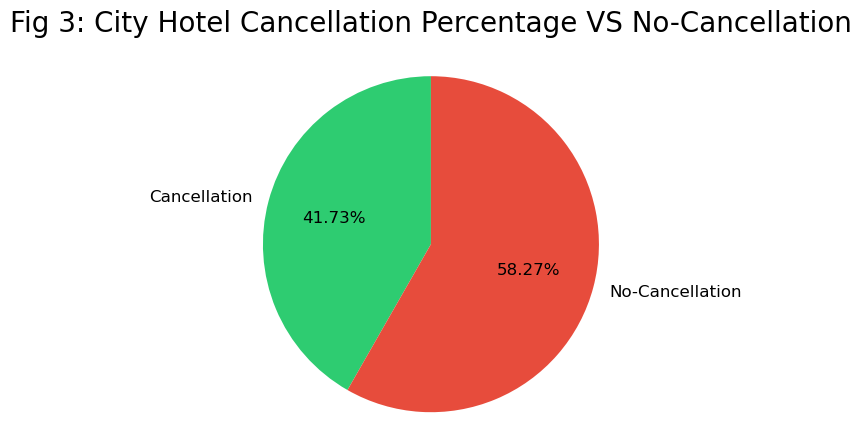

In [7]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

city_hotel_ratio = city_hotel['is_canceled'].value_counts(normalize = True)
city_hotel_ratio

city_hotel_cancellation_percentage = city_hotel_ratio[1] * 100
city_hotel_no_cancellation_percentage = city_hotel_ratio[0] * 100

plt.rc('font', size=12)

labels = ['Cancellation', 'No-Cancellation']
colors = ['#2ecc71', '#e74c3c']

plt.pie([city_hotel_cancellation_percentage, 
         city_hotel_no_cancellation_percentage], 
        labels=labels, autopct='%1.2f%%', colors=colors, startangle=90)

plt.title('Fig 3: City Hotel Cancellation Percentage VS No-Cancellation', fontsize=20, pad=20)
plt.axis('equal')

plt.show()

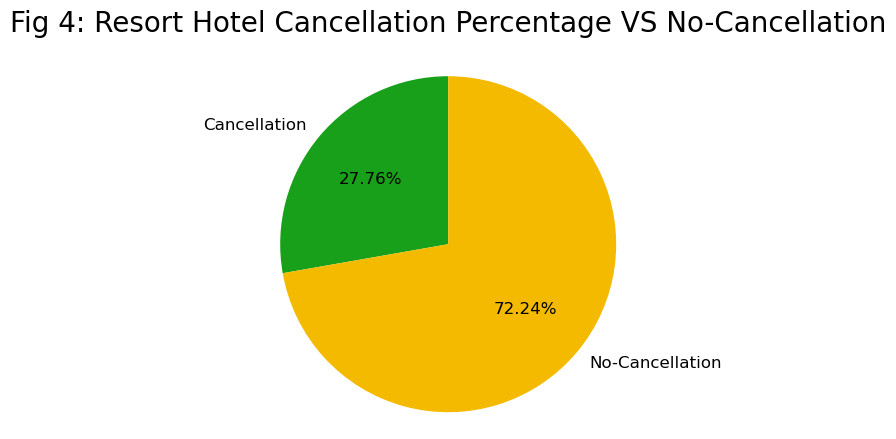

In [8]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

resort_hotel_ratio = resort_hotel['is_canceled'].value_counts(normalize = True)
resort_hotel_ratio

resort_hotel_cancellation_percentage = resort_hotel_ratio[1] * 100
resort_hotel_no_cancellation_percentage = resort_hotel_ratio[0] * 100

plt.rc('font', size=12)

labels = ['Cancellation', 'No-Cancellation']
colors = ['#19a01a', '#f3ba00']

plt.pie([resort_hotel_cancellation_percentage, 
         resort_hotel_no_cancellation_percentage], 
        labels=labels, autopct='%1.2f%%', colors=colors, startangle=90)

plt.title('Fig 4: Resort Hotel Cancellation Percentage VS No-Cancellation', fontsize=20, pad=20)
plt.axis('equal')

plt.show()

Text(0.5, 0, 'meal')

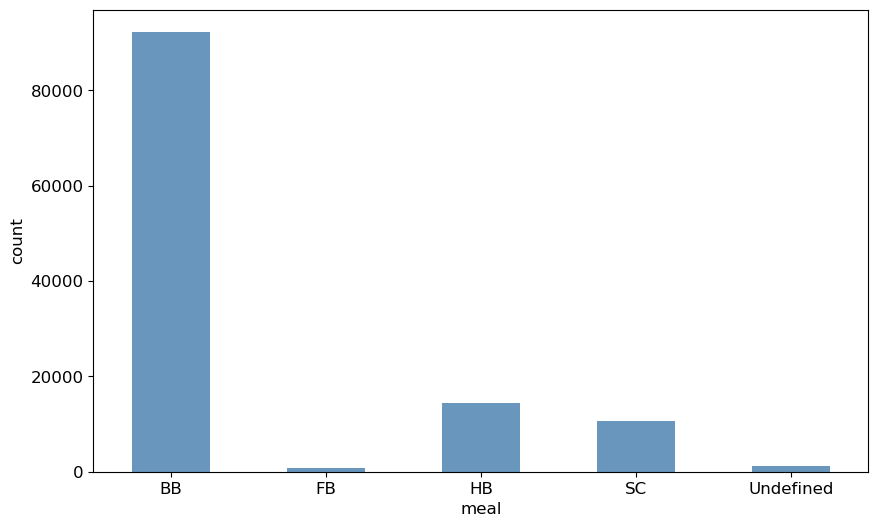

In [9]:
plt.rc('font', size=12)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='meal', data=df , palette=['#5b97ca'],width=0.5)
plt.xlabel('meal')

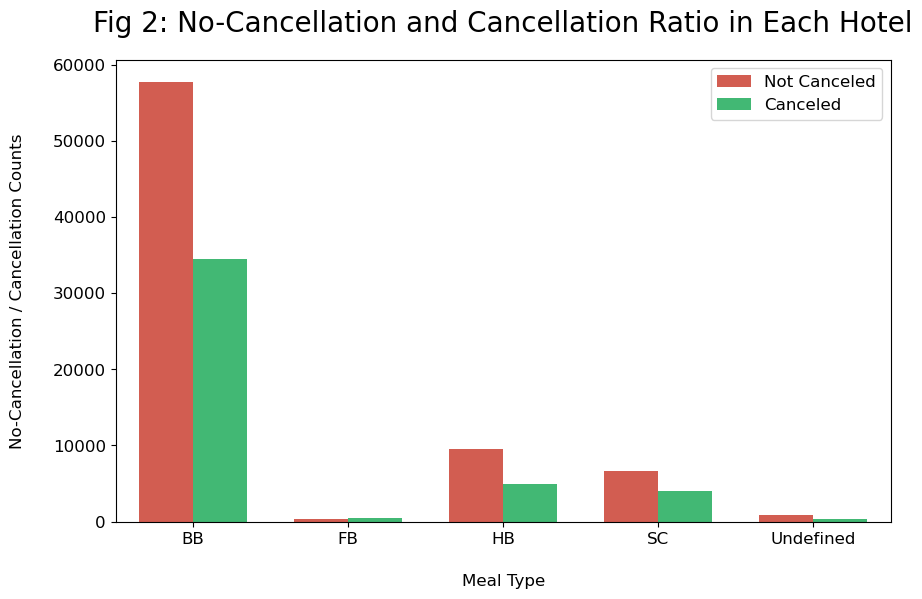

In [10]:
plt.rc('font', size=12)

plt.figure(figsize=(10, 6))

ax = sns.countplot(x='meal', hue='is_canceled', data=df, palette=['#e74c3c', '#2ecc71'], width=0.7)
legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(labels=['Not Canceled', 'Canceled'], bbox_to_anchor=(1, 1))

plt.title('Fig 2: No-Cancellation and Cancellation Ratio in Each Hotel', fontsize=20, pad=20)
plt.xlabel('Meal Type', labelpad=20)
plt.ylabel('No-Cancellation / Cancellation Counts', labelpad=20)

ax.set_facecolor("white")

plt.show()

Text(0.5, 0, 'reserved_room_type')

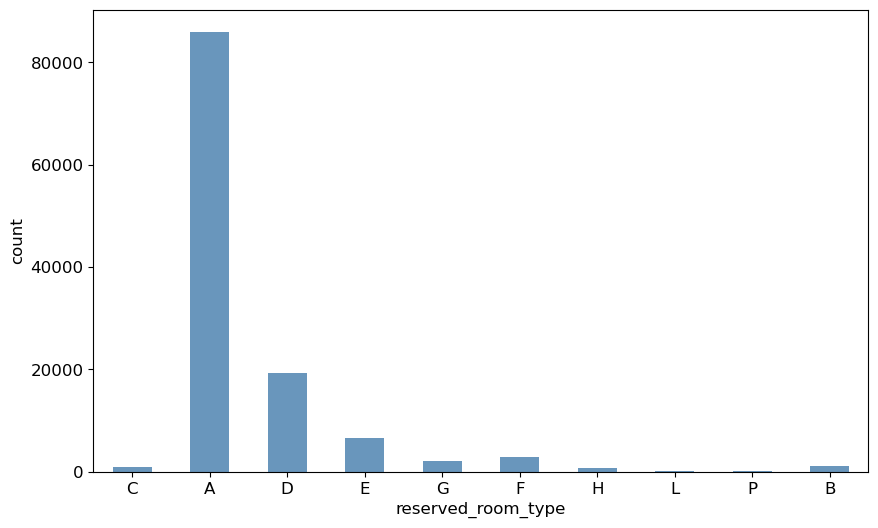

In [11]:
plt.rc('font', size=12)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='reserved_room_type', data=df , palette=['#5b97ca'],width=0.5)
plt.xlabel('reserved_room_type')

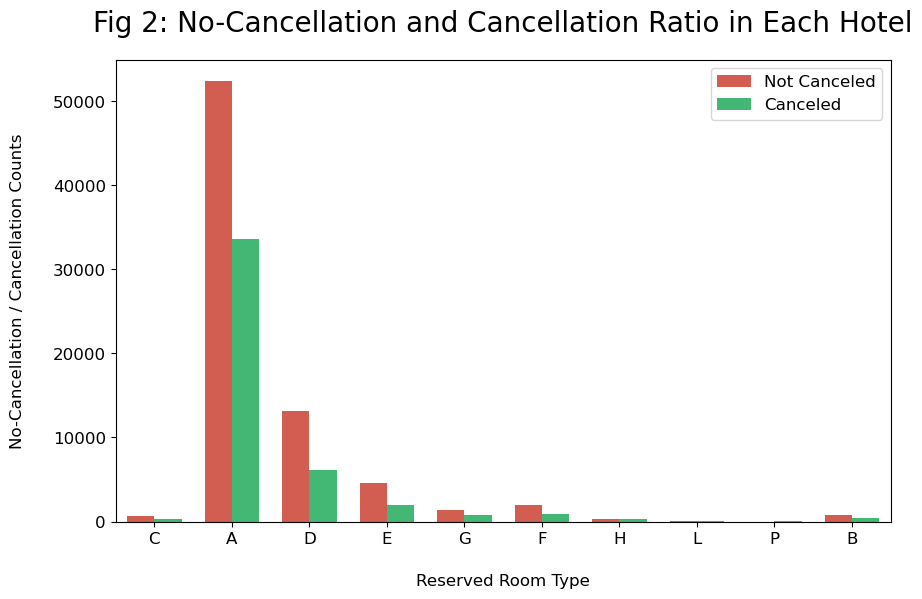

In [10]:
plt.rc('font', size=12)

plt.figure(figsize=(10, 6))

ax = sns.countplot(x='reserved_room_type', hue='is_canceled', data=df, palette=['#e74c3c', '#2ecc71'], width=0.7)
legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(labels=['Not Canceled', 'Canceled'], bbox_to_anchor=(1, 1))

plt.title('Fig 2: No-Cancellation and Cancellation Ratio in Each Hotel', fontsize=20, pad=20)
plt.xlabel('Reserved Room Type', labelpad=20)
plt.ylabel('No-Cancellation / Cancellation Counts', labelpad=20)

ax.set_facecolor("white")

plt.show()

Text(0.5, 0, 'assigned_room_type')

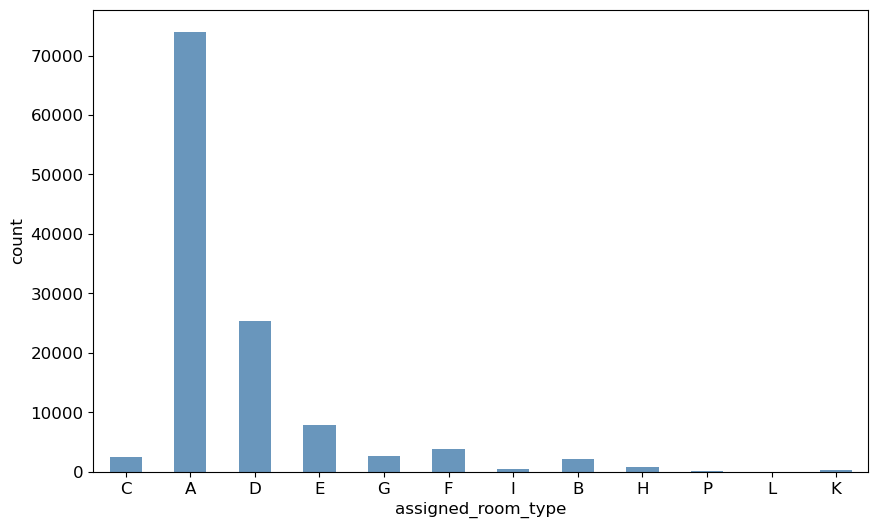

In [12]:
plt.rc('font', size=12)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='assigned_room_type', data=df , palette=['#5b97ca'],width=0.5)
plt.xlabel('assigned_room_type')

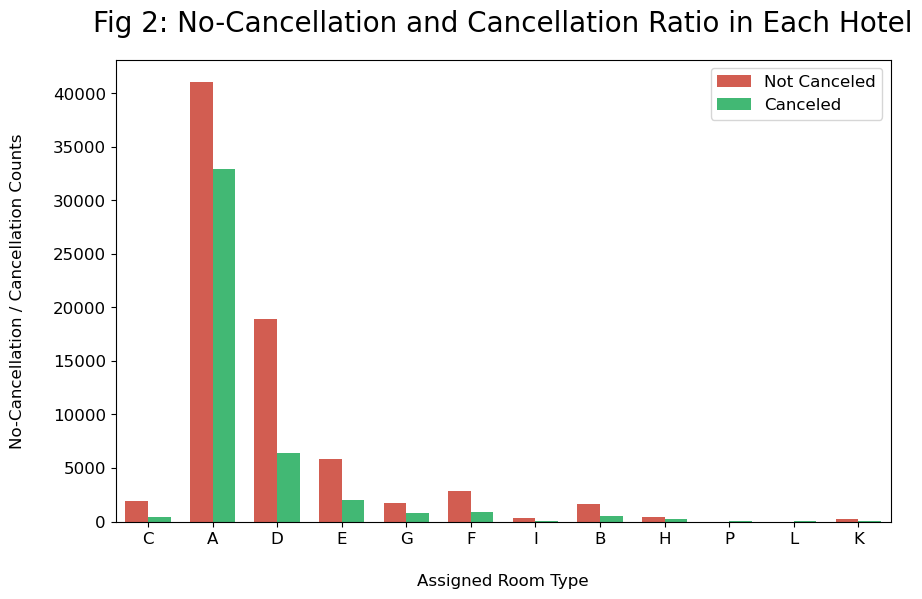

In [12]:
plt.rc('font', size=12)

plt.figure(figsize=(10, 6))

ax = sns.countplot(x='assigned_room_type', hue='is_canceled', data=df, palette=['#e74c3c', '#2ecc71'], width=0.7)
legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(labels=['Not Canceled', 'Canceled'], bbox_to_anchor=(1, 1))

plt.title('Fig 2: No-Cancellation and Cancellation Ratio in Each Hotel', fontsize=20, pad=20)
plt.xlabel('Assigned Room Type', labelpad=20)
plt.ylabel('No-Cancellation / Cancellation Counts', labelpad=20)

ax.set_facecolor("white")

plt.show()

Text(0.5, 0, 'deposit_type')

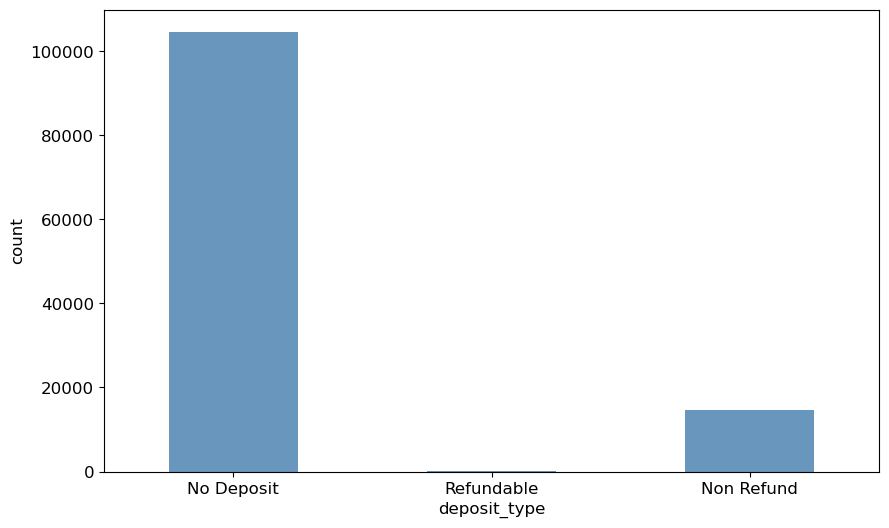

In [13]:
plt.rc('font', size=12)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='deposit_type', data=df , palette=['#5b97ca'],width=0.5)
plt.xlabel('deposit_type')

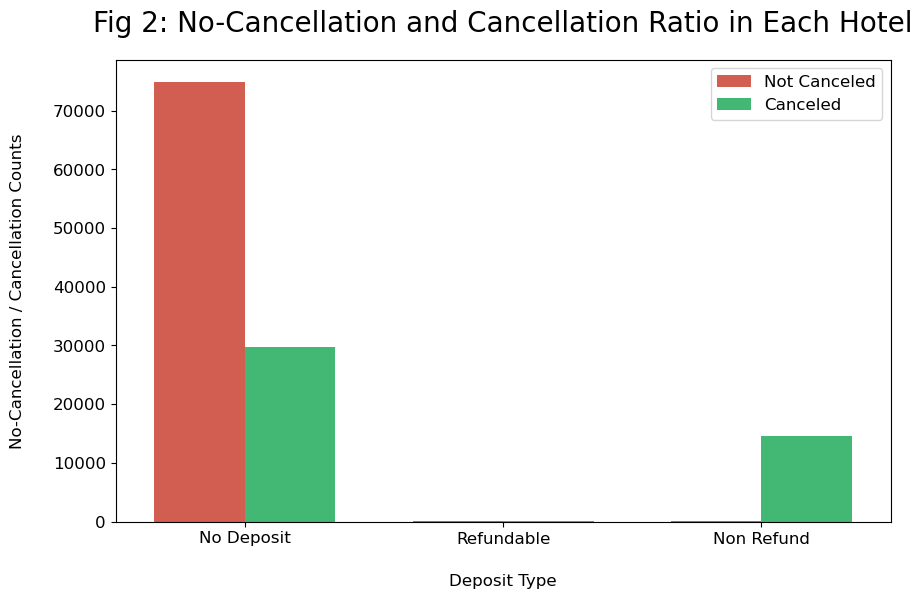

In [14]:
plt.rc('font', size=12)

plt.figure(figsize=(10, 6))

ax = sns.countplot(x='deposit_type', hue='is_canceled', data=df, palette=['#e74c3c', '#2ecc71'], width=0.7)
legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(labels=['Not Canceled', 'Canceled'], bbox_to_anchor=(1, 1))

plt.title('Fig 2: No-Cancellation and Cancellation Ratio in Each Hotel', fontsize=20, pad=20)
plt.xlabel('Deposit Type', labelpad=20)
plt.ylabel('No-Cancellation / Cancellation Counts', labelpad=20)

ax.set_facecolor("white")

plt.show()

Text(0.5, 0, 'required_car_parking_spaces')

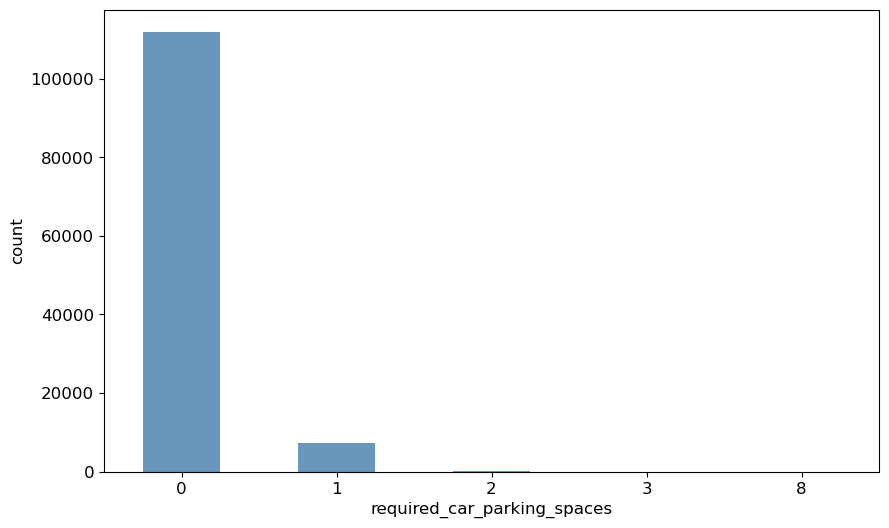

In [14]:
plt.rc('font', size=12)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='required_car_parking_spaces', data=df , palette=['#5b97ca'],width=0.5)
plt.xlabel('required_car_parking_spaces')

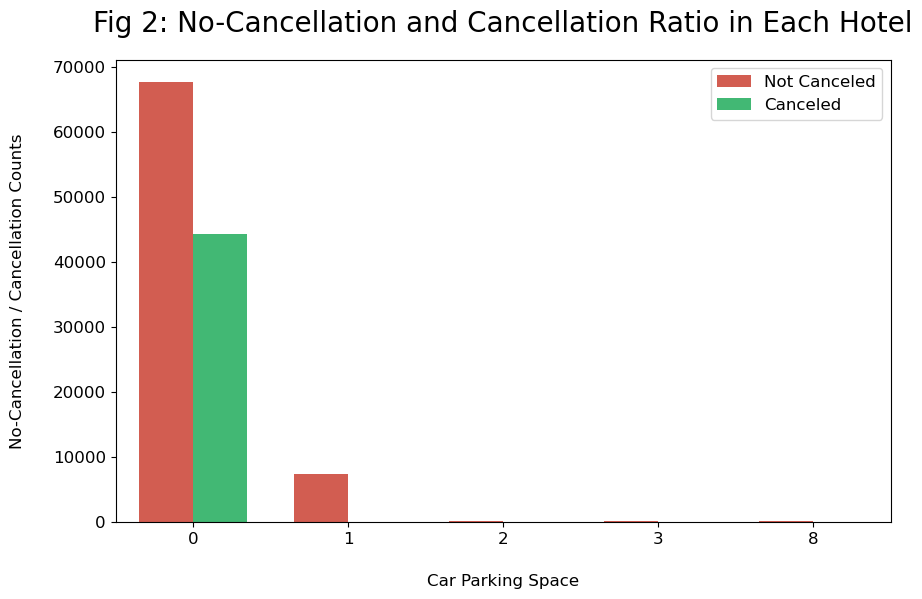

In [16]:
plt.rc('font', size=12)

plt.figure(figsize=(10, 6))

ax = sns.countplot(x='required_car_parking_spaces', hue='is_canceled', data=df, palette=['#e74c3c', '#2ecc71'], width=0.7)
legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(labels=['Not Canceled', 'Canceled'], bbox_to_anchor=(1, 1))

plt.title('Fig 2: No-Cancellation and Cancellation Ratio in Each Hotel', fontsize=20, pad=20)
plt.xlabel('Car Parking Space', labelpad=20)
plt.ylabel('No-Cancellation / Cancellation Counts', labelpad=20)

ax.set_facecolor("white")

plt.show()

Text(0.5, 0, 'month')

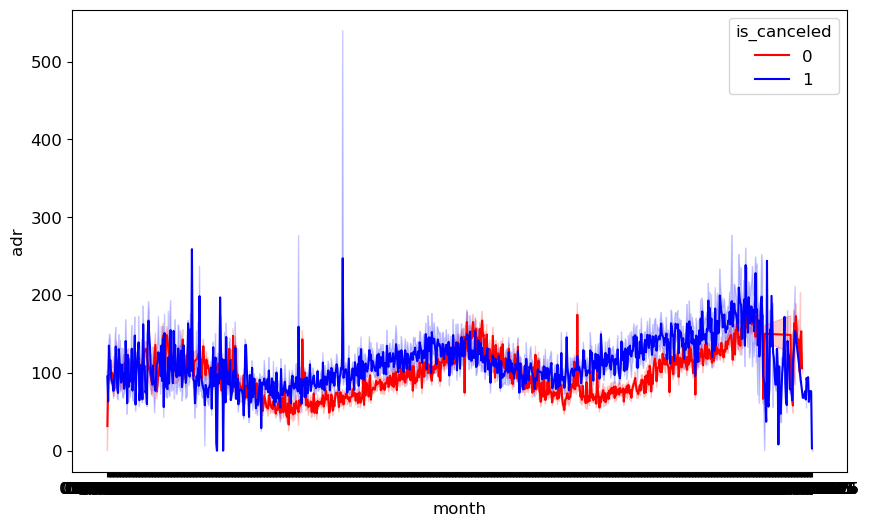

In [17]:
plt.rc('font', size=12)
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='reservation_status_date',y='adr', hue='is_canceled',data=df , palette=['red','blue'])
plt.xlabel('month')

In [18]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('_'*50)
df.isnull().sum()
df.drop(['agent', 'company'], axis = 1, inplace = True)
df.dropna(inplace = True)
df.isnull().sum()
df.describe(include = 'object')

hotel
['Resort Hotel' 'City Hotel']
__________________________________________________
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
__________________________________________________
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
__________________________________________________
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

hotel arrival_date_month    meal country market_segment  \
count       118898             118898  118898  118898         118898   
unique           2                 12       5     177              7   
top     City Hotel             August      BB     PRT      Online TA   
freq         79302              13852   91863   48586          56402   

       distribution_channel reserved_room_type assigned_room_type  \
count                118898             118898             118898   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97730              85601              73863   

       deposit_type customer_type reservation_status  
count        118898        118898             118898  
unique            3             4                  3  
top      No Deposit     Transient          Check-Out  
freq         104163         89174              74745

In [19]:
adr_outlier_removed = df[df['adr'] < 5000].copy()
adr_outlier_removed.describe()

is_canceled      lead_time  arrival_date_year  \
count  118897.000000  118897.000000      118897.000000   
mean        0.371347     104.312018        2016.157657   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     161.000000        2017.000000   
max         1.000000     737.000000        2017.000000   
std         0.483167     106.903570           0.707462   

       arrival_date_week_number  arrival_date_day_of_month  \
count             118897.000000              118897.000000   
mean                  27.166674                  15.800802   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   
std                   13.589966                   8.780321   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            118897.000000         118897.000000  118897.000000   
mean                  0.928905              2.502157       1.858390   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  16.000000             41.000000      55.000000   
std                   0.996217              1.900171       0.578578   

            children         babies  is_repeated_guest  \
count  118897.000000  118897.000000      118897.000000   
mean        0.104208       0.007948           0.032011   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   
std         0.399174       0.097381           0.176030   

       previous_cancellations  previous_bookings_not_canceled  \
count           118897.000000                   118897.000000   
mean                 0.087143                        0.131635   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   
std                  0.845872                        1.484678   

       booking_changes  days_in_waiting_list            adr  \
count    118897.000000         118897.000000  118897.000000   
mean          0.221175              2.330774     101.958683   
min           0.000000              0.000000      -6.380000   
25%           0.000000              0.000000      70.000000   
50%           0.000000              0.000000      95.000000   
75%           0.000000              0.000000     126.000000   
max          21.000000            391.000000     510.000000   
std           0.652784             17.630525      48.091199   

       required_car_parking_spaces  total_of_special_requests  \
count                118897.000000              118897.000000   
mean                      0.061885                   0.571688   
min                       0.000000                   0.000000   
25%                       0.000000                   0.000000   
50%                       0.000000                   0.000000   
75%                       0.000000                   1.000000   
max                       8.000000                   5.000000   
std                       0.244173                   0.792680   

             reservation

In [20]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel.head()

adr
reservation_status_date           
2014-10-17               62.800000
2015-01-01               62.063158
2015-01-20               76.500000
2015-01-30               61.400000
2015-02-17               76.500000

In [21]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
resort_hotel.head()

adr
reservation_status_date           
2014-11-18                0.000000
2015-01-01               61.966667
2015-01-02                9.633750
2015-01-18                0.000000
2015-01-21               37.301209

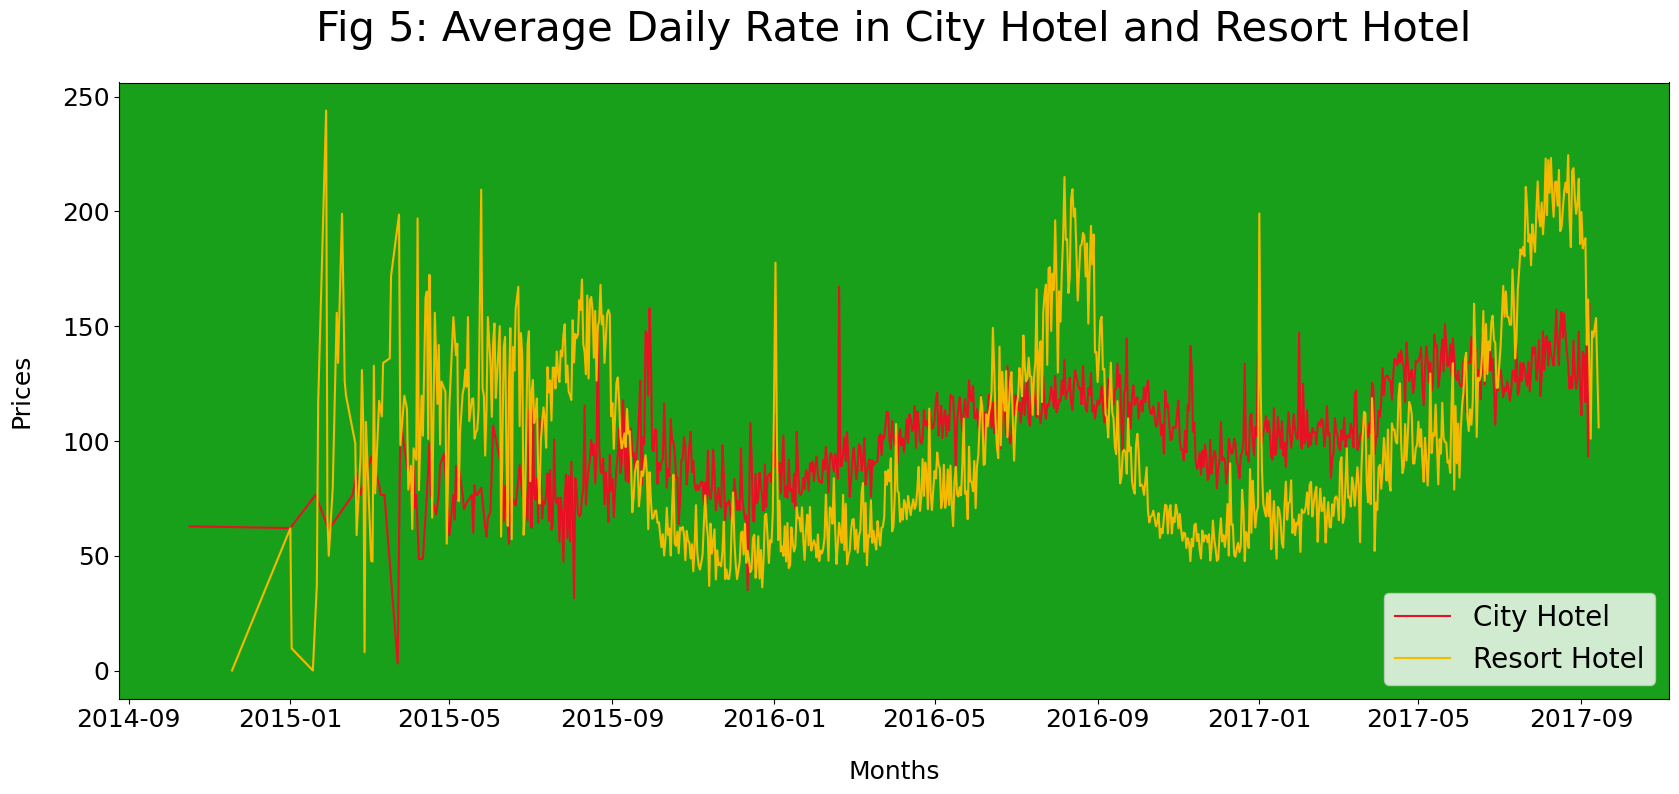

In [22]:
plt.rc('font', size=18)

plt.figure(figsize=(20, 8))

plt.title('Fig 5: Average Daily Rate in City Hotel and Resort Hotel', fontsize=30, pad=30)
plt.xlabel('Months', labelpad=20)
plt.ylabel('Prices', labelpad=20)

plt.gca().set_facecolor('#19a01a')

plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel', color='#e81123')
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel', color='#f3ba00')

plt.legend(fontsize=20)
plt.show()

city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel.reset_index(inplace=True)
city_hotel.sort_values('reservation_status_date', inplace=True)
resort_hotel.reset_index(inplace=True)
resort_hotel.sort_values('reservation_status_date', inplace=True)

plt.rc('font', size=18)

plt.figure(figsize=(20, 8))

plt.title('Fig 5: Average Daily Rate in City Hotel and Resort Hotel', fontsize=30, pad=30)
plt.xlabel('Months', labelpad=20)
plt.ylabel('Average Daily Month', labelpad=20)

plt.gca().set_facecolor('#19a01a')

plt.plot(city_hotel['reservation_status_date'], city_hotel['adr'], label = 'City Hotel', color='#e81123')
plt.plot(resort_hotel['reservation_status_date'], resort_hotel['adr'], label = 'Resort Hotel', color='#f3ba00')

plt.legend(fontsize=20)
plt.show()

In [23]:
no_cancellation_data = df[df['is_canceled'] == 0]
no_cancellation_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   assigned_room_type  booking_changes deposit_type days_in_waiting_list  \
0                   C                3   No Deposit                    0   
1                   C                4   No Deposit                    0   
2                   C                0   No Deposit                    0   
3                   A                0   No Deposit                    0   
4                   A                0   No Deposit                    0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

   reservation_status reservation_status_date  
0           Check-Out              2015-07-01  
1           Check-Out              2015-07-01  
2           Check-Out              2015-07-02  
3           Check-Out              2015-07-02  
4           Check-Out              2015-07-03  

[5 rows x 30 columns]

In [24]:
no_cancellation_prices = no_cancellation_data.groupby('reservation_status_date')[['adr']].mean()
no_cancellation_prices.reset_index(inplace=True)
no_cancellation_prices.sort_values('reservation_status_date', inplace=True)
no_cancellation_prices.head()

reservation_status_date         adr
0              2015-07-01   31.650000
1              2015-07-02   95.924000
2              2015-07-03   97.645205
3              2015-07-04  110.480000
4              2015-07-05  100.308485

In [25]:
no_cancellation_data = df[df['is_canceled'] == 0]

no_cancellation_data.head()

no_cancellation_prices = no_cancellation_data.groupby('reservation_status_date')[['adr']].mean()
no_cancellation_prices.reset_index(inplace=True)
no_cancellation_prices.sort_values('reservation_status_date', inplace=True)

no_cancellation_prices.head()

reservation_status_date         adr
0              2015-07-01   31.650000
1              2015-07-02   95.924000
2              2015-07-03   97.645205
3              2015-07-04  110.480000
4              2015-07-05  100.308485

In [26]:
cancellation_data = df[df['is_canceled'] == 1]
cancellation_data.head()

hotel  is_canceled  lead_time  arrival_date_year  \
8   Resort Hotel            1         85               2015   
9   Resort Hotel            1         75               2015   
10  Resort Hotel            1         23               2015   
27  Resort Hotel            1         60               2015   
32  Resort Hotel            1         96               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
8                July                        27                          1   
9                July                        27                          1   
10               July                        27                          1   
27               July                        27                          1   
32               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
8                         0                     3       2  ...   
9                         0                     3       2  ...   
10                        0                     4       2  ...   
27                        2                     5       2  ...   
32                        2                     8       2  ...   

    assigned_room_type  booking_changes deposit_type days_in_waiting_list  \
8                    A                0   No Deposit                    0   
9                    D                0   No Deposit                    0   
10                   E                0   No Deposit                    0   
27                   E                0   No Deposit                    0   
32                   E                0   No Deposit                    0   

   customer_type    adr  required_car_parking_spaces  \
8      Transient   82.0                            0   
9      Transient  105.5                            0   
10     Transient  123.0                            0   
27     Transient  107.0                            0   
32     Transient  108.3                            0   

    total_of_special_requests  reservation_status reservation_status_date  
8                           1            Canceled              2015-05-06  
9                           0            Canceled              2015-04-22  
10                          0            Canceled              2015-06-23  
27                          2            Canceled              2015-05-11  
32                          2            Canceled              2015-05-29  

[5 rows x 30 columns]

In [27]:
cancellation_prices = cancellation_data.groupby('reservation_status_date')[['adr']].mean()
cancellation_prices.reset_index(inplace=True)
cancellation_prices.sort_values('reservation_status_date', inplace=True)

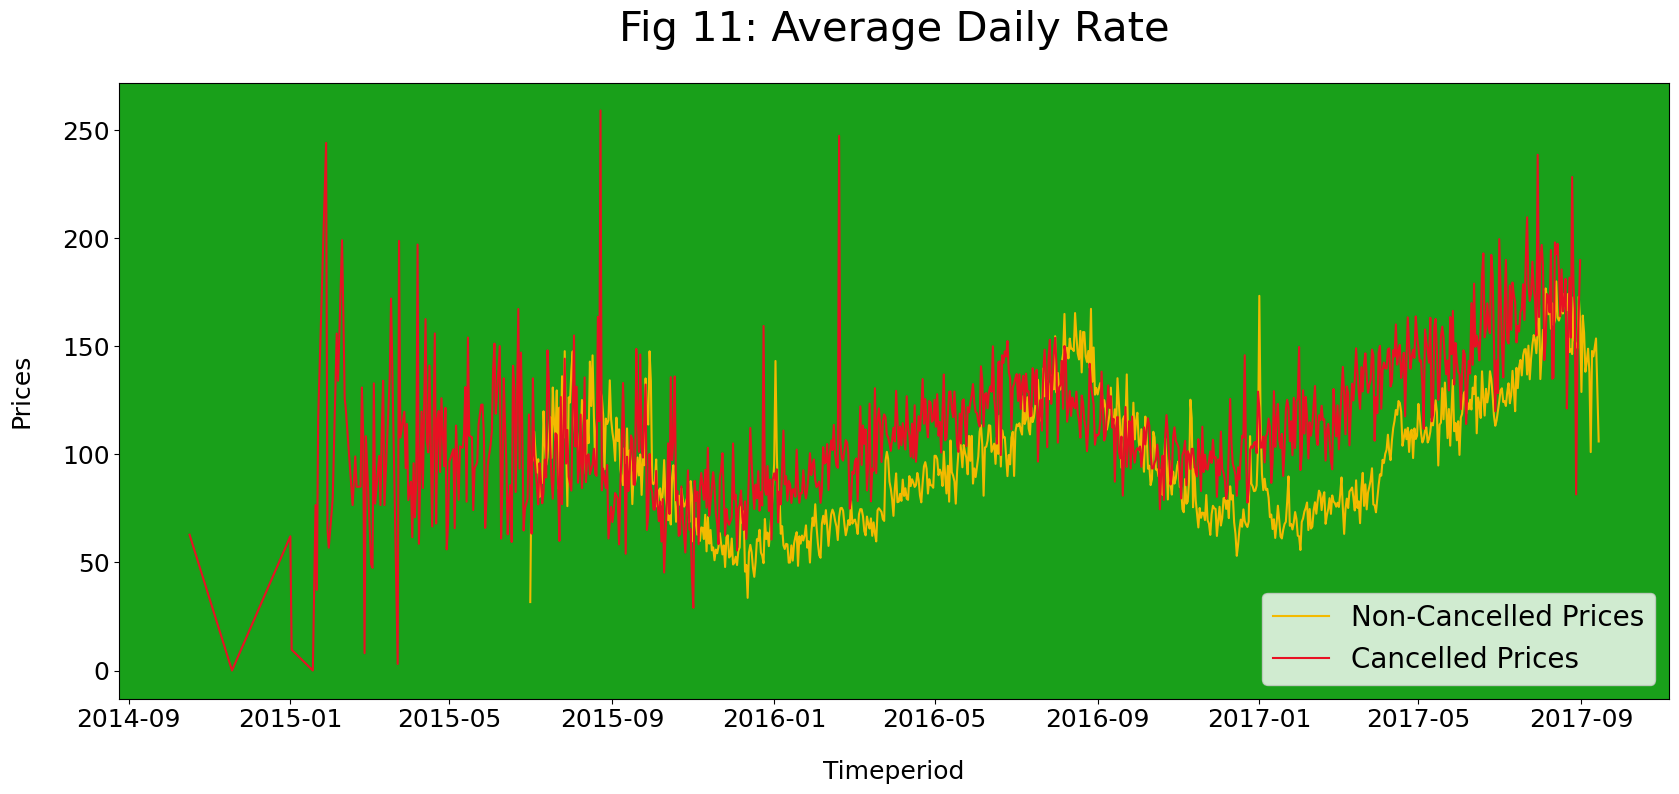

In [28]:
plt.rc('font', size=18)

plt.figure(figsize=(20, 8))

plt.gca().set_facecolor('#19a01a')

plt.plot(no_cancellation_prices['reservation_status_date'], 
         no_cancellation_prices['adr'], label='Non-Cancelled Prices', color='#f3ba00')

plt.plot(cancellation_prices['reservation_status_date'], 
         cancellation_prices['adr'], label='Cancelled Prices', color='#e81123')

plt.title('Fig 11: Average Daily Rate', fontsize=30, pad=30)
plt.xlabel('Timeperiod', labelpad=20)
plt.ylabel('Prices', labelpad=20)

plt.legend(fontsize=20)
plt.show()